<font face="Roboto" size=4>
<div dir=rtl align=center>
<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">
<br>
<font size=6>
<b>Genetic Clustering of the Iris Dataset</b>
<br>
<b><font size=5>Artificial Intelligence Course</b>
<br>
<b><font size=5>Professor: Dr. Mehdi Ghatee</b>
<br>
<font size=4>
<b>Mahsa Goodarzi - 9912043</b>
<br>
<hr>
</div>
</font>

# Imports

In [ ]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import cluster
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
iris_data = pd.read_csv('/content/drive/My Drive/Dataset/iris.data')

# Preprocessing

In [ ]:
iris_data.head()

,f1,f2,f3,f4,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data.tail()

,f1,f2,f3,f4,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris_data.info

<bound method DataFrame.info of       f1   f2   f3   f4           class
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

In [ ]:
print(iris_data['class'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


**Features and Trget Varibles**

In [ ]:
basic_samples = iris_data.drop(columns='class')
target_labels = iris_data['class'].ravel()

In [ ]:
label_names = np.unique(target_labels)
print(label_names)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


**Standardize Features And Apply PCA**

In [ ]:
normalized_samples = StandardScaler().fit_transform(basic_samples)
samples_pca = PCA(n_components=2).fit_transform(normalized_samples)

# K-Means Clustering

**K-Means**

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10, random_state=42)
kmeans.fit(samples_pca)
kmeans_labels = kmeans.predict(samples_pca)

**Plot K-Means Clusters**

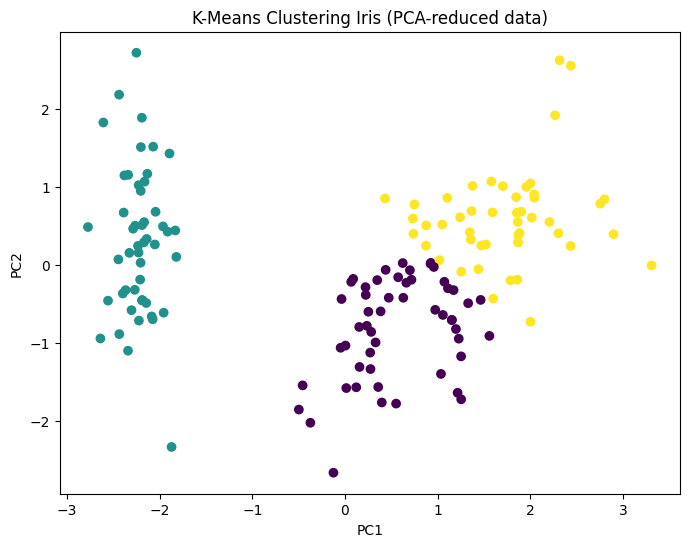

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(samples_pca[:, 0], samples_pca[:, 1], c=kmeans_labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clustering Iris (PCA-reduced data)")
plt.show()

**K-Means Contingency Matrix and Details**

In [ ]:
k_conting_matrix = cluster.contingency_matrix(labels_true=target_labels, labels_pred=kmeans_labels)
print(f"K-Means Contingency Matrix: \n{k_conting_matrix}")
print()

for i in range(len(k_conting_matrix)):
  for j in range(len(k_conting_matrix[i])):
    print(f"(Actual Label: {label_names[i]}, Preticted Label: {j}) = {k_conting_matrix[i][j]}")

K-Means Contingency Matrix: 
[[ 0 50  0]
 [39  0 11]
 [14  0 36]]

(Actual Label: Iris-setosa, Preticted Label: 0) = 0
(Actual Label: Iris-setosa, Preticted Label: 1) = 50
(Actual Label: Iris-setosa, Preticted Label: 2) = 0
(Actual Label: Iris-versicolor, Preticted Label: 0) = 39
(Actual Label: Iris-versicolor, Preticted Label: 1) = 0
(Actual Label: Iris-versicolor, Preticted Label: 2) = 11
(Actual Label: Iris-virginica, Preticted Label: 0) = 14
(Actual Label: Iris-virginica, Preticted Label: 1) = 0
(Actual Label: Iris-virginica, Preticted Label: 2) = 36


**K-Means Purity Score**

In [ ]:
kmeans_clustering_purity = np.sum((np.max(k_conting_matrix, axis=1))) / np.sum(k_conting_matrix)
print(f"K-Means Clustering Purity: {kmeans_clustering_purity}")

K-Means Clustering Purity: 0.8333333333333334


# Genetic Clustering

**Generate Random Population of n Chromosomes**

In [ ]:
def random_chromosome():
  chromosome = np.random.randint(0, 3, size=150)
  # The last element of each chromosome indicates the fitness of that chromosome, which is initially set to zero
  chromosome = np.append(chromosome, 0.0)
  return chromosome

def generate_population(number_of_chromosomes):
  return np.array([random_chromosome() for _ in range(number_of_chromosomes)])

**Initial Population**

In [ ]:
initial_population = generate_population(number_of_chromosomes=1000)
print(f"Initial Population: \n{initial_population}")

Initial Population: 
[[1. 2. 1. ... 1. 0. 0.]
 [0. 1. 0. ... 2. 0. 0.]
 [1. 1. 1. ... 0. 2. 0.]
 ...
 [0. 2. 2. ... 1. 1. 0.]
 [1. 0. 1. ... 1. 0. 0.]
 [2. 2. 0. ... 0. 1. 0.]]


**Fitness Function**

In [ ]:
def fitness(chromosome):
    cluster_indices = [np.where(chromosome == i)[0] for i in range(3)]
    clusters = [iris_data.iloc[indices] for indices in cluster_indices]

    differences = [np.mean([np.linalg.norm(cluster[col] - cluster[col].mean()) for col in iris_data.columns[:-1]]) for cluster in clusters]
    sizes = [len(cluster) / len(iris_data) for cluster in clusters]

    fitness_value = sum(diff * size for diff, size in zip(differences, sizes))
    return fitness_value

**Calculate the Fitness for the Initial Population**

In [ ]:
for chromosome in initial_population:
  chromosome[-1] = fitness(chromosome[:-1])

In [ ]:
print(f"Initail Population With Fitness: \n{initial_population}")

Initail Population With Fitness: 
[[1.         2.         1.         ... 1.         0.         6.5645113 ]
 [0.         1.         0.         ... 2.         0.         6.68348257]
 [1.         1.         1.         ... 0.         2.         6.6500846 ]
 ...
 [0.         2.         2.         ... 1.         1.         6.63565059]
 [1.         0.         1.         ... 1.         0.         6.68531173]
 [2.         2.         0.         ... 0.         1.         6.56585228]]


**Selection Function**

In [ ]:
def selection(initial_population, num):
    return np.array(sorted(initial_population, key=lambda x: x[-1]))[:num]

**Select the Best 2 Individuals from the Initial Population**

In [ ]:
initial_population = selection(initial_population, 2)
# print(initial_population)

**Mutation Function**

In [ ]:
def mutation(chromosome, mutation_rate):
    for i in range(150):
        if np.random.rand() < mutation_rate:
            chromosome[i] = np.random.randint(0, 3)
    return chromosome

**Crossover Function**

In [ ]:
def crossover(population, cross_rate, mutation_rate):
  new_population = population.copy()

  for parent1 in new_population:
    for parent2 in new_population:

      # Number of childs = 2
      for _ in range(2):
        child = np.where(np.random.rand() < cross_rate, parent1, parent2)
        child = mutation(child, mutation_rate)

        new_population = np.append(new_population, [child], axis=0)
  return new_population

**Evolution**

In [ ]:
# Create an Empty List for the Best Fitness
new_population = initial_population.copy()
best_fitness = []

# Loop for 1000 Generations
for i in range(1000):
    # Perform Crossover on the Current Population
    new_population = crossover(new_population, 0.5, 0.05)
    # Calculate the Fitness for the New Population
    for chromosome in new_population:
      chromosome[-1] = fitness(chromosome[:-1])
    # Select the Best 2 individuals from the New Population
    new_population = selection(new_population, 2)
    best_fitness.append(new_population[0][-1])

for i in range(len(best_fitness)):
  print(f"The Best Amount of Fitness in Generation {i}: {best_fitness[i]}")

The Best Amount of Fitness in Generation 0: 6.385990357848232
The Best Amount of Fitness in Generation 1: 6.337873688561439
The Best Amount of Fitness in Generation 2: 6.252421315925776
The Best Amount of Fitness in Generation 3: 6.252421315925776
The Best Amount of Fitness in Generation 4: 6.124344552824179
The Best Amount of Fitness in Generation 5: 6.043370829536113
The Best Amount of Fitness in Generation 6: 5.980708402545767
The Best Amount of Fitness in Generation 7: 5.965531421709931
The Best Amount of Fitness in Generation 8: 5.9082008188356445
The Best Amount of Fitness in Generation 9: 5.9067519888364775
The Best Amount of Fitness in Generation 10: 5.838475977726456
The Best Amount of Fitness in Generation 11: 5.810163985253102
The Best Amount of Fitness in Generation 12: 5.725104090912141
The Best Amount of Fitness in Generation 13: 5.725104090912141
The Best Amount of Fitness in Generation 14: 5.715773695319235
The Best Amount of Fitness in Generation 15: 5.6717507171805845

**Plot Evolution of Fitness Value**

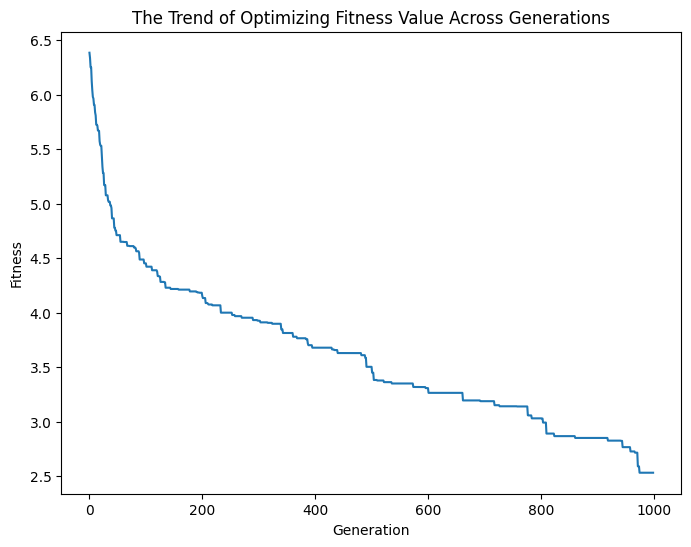

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(best_fitness)
plt.ylabel('Fitness')
plt.xlabel('Generation')
plt.title("The Trend of Optimizing Fitness Value Across Generations")
plt.show()

**Determine the Best Solution**

In [ ]:
best_solution = new_population[0][:-1]
print(best_solution)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1.
 2. 1. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 1.]


**Plot Genetic Clusters**

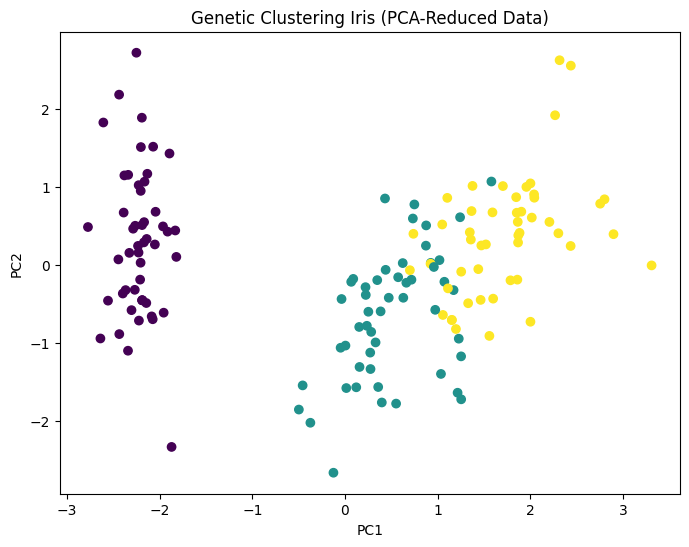

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(samples_pca[:, 0], samples_pca[:, 1], c=best_solution)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Genetic Clustering Iris (PCA-Reduced Data)")
plt.show()

**Genetic Contingency Matrix and Details**

In [ ]:
gen_conting_matrix = cluster.contingency_matrix(labels_true=target_labels, labels_pred=best_solution)
print(f"Genetic Contingency Matrix: \n{gen_conting_matrix}")
print()

for i in range(len(gen_conting_matrix)):
  for j in range(len(gen_conting_matrix[i])):
    print(f"(Actual Label: {label_names[i]}, Preticted Label: {j}) = {gen_conting_matrix[i][j]}")

Genetic Contingency Matrix: 
[[50  0  0]
 [ 0 43  7]
 [ 0  8 42]]

(Actual Label: Iris-setosa, Preticted Label: 0) = 50
(Actual Label: Iris-setosa, Preticted Label: 1) = 0
(Actual Label: Iris-setosa, Preticted Label: 2) = 0
(Actual Label: Iris-versicolor, Preticted Label: 0) = 0
(Actual Label: Iris-versicolor, Preticted Label: 1) = 43
(Actual Label: Iris-versicolor, Preticted Label: 2) = 7
(Actual Label: Iris-virginica, Preticted Label: 0) = 0
(Actual Label: Iris-virginica, Preticted Label: 1) = 8
(Actual Label: Iris-virginica, Preticted Label: 2) = 42


**Genetic Purity Score**

In [ ]:
genetic_clustering_purity = np.sum((np.max(gen_conting_matrix, axis=1))) / np.sum(gen_conting_matrix)
print(f"Genetic Clustering Purity: {genetic_clustering_purity}")

Genetic Clustering Purity: 0.9
